In [1]:
import copy
import numpy as np

from numpy.random import shuffle
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm

import funcs as f
import utils as utl

---

## Input

Input size:  (64, 64)
dtype: uint8 | max: 224 | min: 36


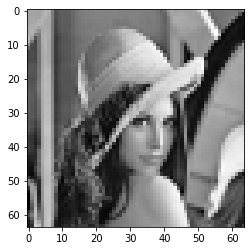

In [2]:
C = np.array([1, 80, 100, 150, 255])
repeats = 1
shape = (64,64)
img = utl.import_img("input.png", bw=True, newshape=shape)

---

## Initial labeling and a_i

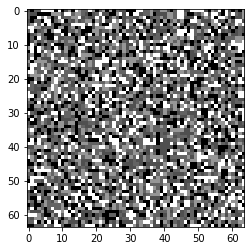

In [3]:
k_init = f.initial_labeling_random(img, C)
plt.imshow(np.reshape(k_init, shape), cmap='gray')

In [4]:
# a_i
a_shuffle = np.copy(C)
shuffle(a_shuffle)

80

In [19]:
a_i = a_shuffle[2]
a_i

100

---

## Graph init

In [12]:
@njit
def indicator(k, k_, scale):
    if k != k_:
        return scale
    else:
        return 50

In [13]:
@njit
def init_g2(img, labeling, a_i, scale):
    
    h, w = img.shape[:2]
    img = img.flatten()

    g = np.zeros((h*w + 2, h*w + 2), dtype = np.int32)

    g[0, 1:-1] = np.abs( a_i - img)
    g[1:-1, -1] = np.abs( labeling - img)

    for i in range(h):
        for j in range(w):
            index = j + i*w + 1
            # left
            if j > 0:
                left = j - 1 + i*w + 1
                g[index, left] = scale #indicator( labeling[index-1], labeling[left-1], scale )
            # right
            if j < w - 1:
                right = j + 1 + i*w + 1
                g[index, right] = scale #indicator( labeling[index-1], labeling[right-1], scale )
            # up
            if i > 0:
                up = j + (i-1)*w + 1
                g[index, up] = scale #indicator( labeling[index-1], labeling[up-1], scale )
            # down
            if i < h - 1:
                down = j + (i+1)*w + 1
                g[index, down] = scale #indicator( labeling[index-1], labeling[down-1], scale )
                
    return g

In [14]:
g = init_g2(img, k_init, a_i, scale=10)
#plt.subplots(figsize=(20, 20)) 
#plt.imshow(g, cmap='gray')

---

## MaxFlow-MinCut

1


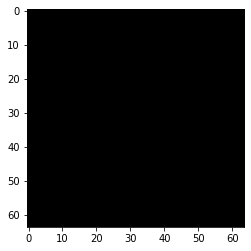

In [15]:
res = f.Ford_Falkerson(img, g)
plt.imshow(np.reshape(res, shape), cmap='gray')
print(a_i)

---

## Mask to labeling translation

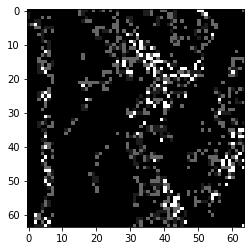

In [16]:
labeling = f.translate_to_labeling(res, k_init, a_i)
plt.imshow(np.reshape(labeling, shape), cmap='gray')

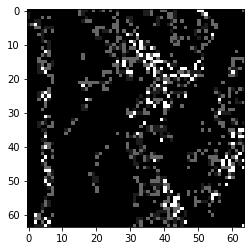

In [17]:
k_init = labeling
plt.imshow(np.reshape(k_init, shape), cmap='gray')